# ML_이상치 처리

## 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [2]:
# 데이터프레임으로 만들기
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# 데이터 파악
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
# 데이터 통계 파악
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## 2. 데이터 전처리

In [5]:
# 1. 타겟 데이터 추가
df["target"] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 3. 결측치 파악

In [6]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

## 4. 시각화

* 이상치를 시각화로 파악

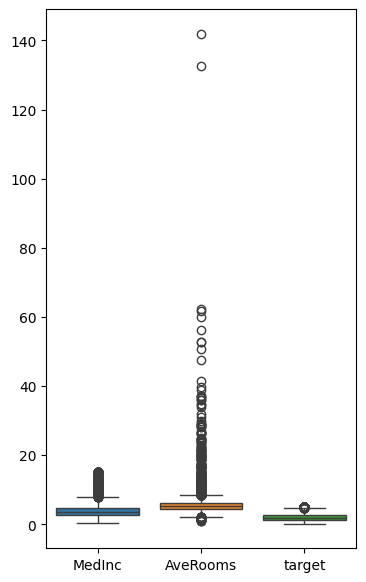

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 7))
sns.boxplot(data=df[["MedInc", "AveRooms", "target"]])
plt.show()

# 이상치 발견

## 5. 이상치 제거

* IQR로 이상치 제거하는 방법 -> 앞으로 이거 쓰면 됨 (한호강사 피셜)

In [8]:
def remove_iqr(df,columns):        # ["col1", "col2", "col3"] -> 이런식으로 진행될 것.
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    # 이상치 제거 후 데이터프레임 반환
    return df_clean

# 이상치 제거 전 데이터 확인
print("이상치 제거 전 데이터 수:", df.shape)
print("이상치 제거 전 타겟 평균:", df["target"].mean())
print("이상치 제거 전 타겟 표준편차:", df["target"].std())

이상치 제거 전 데이터 수: (20640, 9)
이상치 제거 전 타겟 평균: 2.0685581690891475
이상치 제거 전 타겟 표준편차: 1.1539561587441385


In [9]:
df_cleaned = remove_iqr(df, ["MedInc", "AveRooms", "target"])
# 이상치 제거 후 데이터 확인
print("이상치 제거 후 데이터 수:", df_cleaned.shape)
print("이상치 제거 후 타겟 평균:", df_cleaned["target"].mean())
print("이상치 제거 후 타겟 표준편차:", df_cleaned["target"].std())

이상치 제거 후 데이터 수: (18818, 9)
이상치 제거 후 타겟 평균: 1.8706092023594432
이상치 제거 후 타겟 표준편차: 0.9103456052938872


# ML_범주형 변수 인코딩

## 1. 데이터 불러오기

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. 예제 데이터 생성
data = {
    'gender': ['male', 'female', 'female', 'male', 'female'],
    'grade': ['A', 'B', 'A', 'C', 'B']
}

df = pd.DataFrame(data)
# print("📋 원본 데이터:\n", df)
df

,gender,grade
0,male,A
1,female,B
2,female,A
3,male,C
4,female,B


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  5 non-null      object
 1   grade   5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


## 2. 텍스트데이터 수치화(라벨인코딩)

* 각 범주를 숫자로 매핑

In [12]:
# 2. LabelEncoder 객체 생성
le_gender = LabelEncoder()
le_grade = LabelEncoder()

# 3. 각 열에 대해 라벨 인코딩 적용
df['gender_encoded'] = le_gender.fit_transform(df['gender'])
df['grade_encoded'] = le_grade.fit_transform(df['grade'])

In [13]:
print("\n✅ 라벨 인코딩 결과:\n", df)

# 4. 인코딩 매핑 확인
print("\n📎 gender 매핑:", dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))
print("📎 grade 매핑:", dict(zip(le_grade.classes_, le_grade.transform(le_grade.classes_))))


✅ 라벨 인코딩 결과:
    gender grade  gender_encoded  grade_encoded
0    male     A               1              0
1  female     B               0              1
2  female     A               0              0
3    male     C               1              2
4  female     B               0              1

📎 gender 매핑: {'female': np.int64(0), 'male': np.int64(1)}
📎 grade 매핑: {'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2)}


## 3. 텍스트데이터 벡터화(원-핫인코딩)

In [14]:
df = pd.get_dummies(df, columns=['grade'])
df

,gender,gender_encoded,grade_encoded,grade_A,grade_B,grade_C
0,male,1,0,True,False,False
1,female,0,1,False,True,False
2,female,0,0,True,False,False
3,male,1,2,False,False,True
4,female,0,1,False,True,False


In [15]:
df = pd.get_dummies(df, columns=['gender'])
df

,gender_encoded,grade_encoded,grade_A,grade_B,grade_C,gender_female,gender_male
0,1,0,True,False,False,False,True
1,0,1,False,True,False,True,False
2,0,0,True,False,False,True,False
3,1,2,False,False,True,False,True
4,0,1,False,True,False,True,False


* 정답과 얼마나 관계있느냐? -> 상관관계 분석(Correlation)

# ML_스케일링

* 특성 간 크기 차이 보정
    * MinMaxScaler: 0~1 사이로 정규화
    * StandardScaler: 평균 0, 표준편차 1로 표준화

* 거의 데이터전처리 마지막단계에서 사용

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 예제 데이터 생성
data = {
    'height': [150, 160, 165, 180, 155],
    'weight': [60, 65, 55, 90, 62]
}

df = pd.DataFrame(data)
print("📋 원본 데이터:\n", df)

# StandardScaler 적용 (표준화)
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=['height_std', 'weight_std'])

# MinMaxScaler 적용 (정규화)
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=['height_minmax', 'weight_minmax'])

# 결과 병합 출력
df_result = pd.concat([df, df_std, df_minmax], axis=1)
print("\n✅ 스케일링 결과:\n", df_result.round(2))

📋 원본 데이터:
    height  weight
0     150      60
1     160      65
2     165      55
3     180      90
4     155      62

✅ 스케일링 결과:
    height  weight  height_std  weight_std  height_minmax  weight_minmax
0     150      60       -1.17       -0.52           0.00           0.14
1     160      65       -0.19       -0.11           0.33           0.29
2     165      55        0.29       -0.93           0.50           0.00
3     180      90        1.75        1.93           1.00           1.00
4     155      62       -0.68       -0.36           0.17           0.20


* 스케일링 시 주의사항
    * Train과 Test가 나눠진 채로 주어진 경우, 각 열의 범주가 각각 다르기 때문에 Train에서 만든 거 가지고 Test에 해야됨.(각각 하면 안돼요.)
    * 따로 스케일링한다고 하면, 각각의 기준이 달라지게끔 한다고 보면 됨.

# ML_데이터 분리

## 1. 데이터 불러오기

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Iris 데이터셋 로드
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [18]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 2. 데이터 분리

In [19]:
# 데이터프레임으로 변환
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# 타겟 변수 추가
df_iris['target'] = iris.target

# 데이터 분리
X = df_iris.drop('target', axis=1)
y = df_iris['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # stratify=y는 타겟 데이터(y)에 맞춰서 분할을 해야 한다.
print("Train 데이터 크기:", X_train.shape)
print("Test 데이터 크기:", X_test.shape)
print("Train 타겟 크기:", y_train.shape)
print("Test 타겟 크기:", y_test.shape)
print("="*50)
print("Train 데이터 샘플:\n", X_train.head())
print("Test 데이터 샘플:\n", X_test.head())

# 분류데이터 분할 시, 정답 데이터(y)에 맞춰서 분할을 해야 한다.

Train 데이터 크기: (120, 4)
Test 데이터 크기: (30, 4)
Train 타겟 크기: (120,)
Test 타겟 크기: (30,)
Train 데이터 샘플:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
8                  4.4               2.9                1.4               0.2
106                4.9               2.5                4.5               1.7
76                 6.8               2.8                4.8               1.4
9                  4.9               3.1                1.5               0.1
89                 5.5               2.5                4.0               1.3
Test 데이터 샘플:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
38                 4.4               3.0                1.3               0.2
127                6.1               3.0                4.9               1.8
57                 4.9               2.4                3.3               1.0
93                 5.0               2.3                3.3               1.0
42                 4.4         

✅ 분류 데이터 분할 시 주의사항

🔸 정답 데이터셋(y)에 맞춰서 분할해야 한다

> 👉 `stratify=y` 옵션을 사용하자!**

---

✅ 왜 `y`에 맞춰야 할까?

분류 문제에서는 `y` (정답 label)의 클래스 분포가 불균형할 수 있기 때문에,  
단순히 랜덤으로 분할하면 train/test 데이터의 **클래스 비율이 깨질 수 있음**.

---

✅ 해결 방법: `stratify=y`

python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

```
이때 random_state를 고정하면,
항상 같은 결과가 나오도록 무작위 동작을 "재현 가능하게" 만들어줘.

숫자 42는 그냥 예시야.
아무 숫자나 넣어도 되지만, 관행적으로 42를 많이 써.
(도널드의 소설 『은하수를 여행하는 히치하이커를 위한 안내서』에서 "삶, 우주, 그리고 모든 것에 대한 해답 = 42"라는 농담에서 유래했어.)
```

# ML_교차검증

## 1. K-Fold 교차검증

In [20]:

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 데이터 로드
X, y = load_iris(return_X_y=True)

# 모델 정의
model = RandomForestClassifier()

# 5-Fold 교차검증
scores = cross_val_score(model, X, y, cv=5)

print("각 Fold 정확도:", scores)
print("평균 정확도:", scores.mean())

print("="*50)

# 10-Fold 교차검증
scores = cross_val_score(model, X, y, cv=10)

print("각 Fold 정확도:", scores)
print("평균 정확도:", scores.mean())

각 Fold 정확도: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
평균 정확도: 0.9666666666666668
각 Fold 정확도: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
평균 정확도: 0.9666666666666666


## 2. Stratified K-Fold 교차검증

In [21]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5)     # 숫자 5 나 10
scores = cross_val_score(model, X, y, cv=cv)

print("각 Fold 정확도:", scores)
print("평균 정확도:", scores.mean())

각 Fold 정확도: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
평균 정확도: 0.9666666666666668


📌 결론

- 모델을 평가할 때 단순한 train/test 분할만으로는 **신뢰도 부족**
- **교차검증은 더 많은 실험을 통해 평균 성능을 추정**
- **5-Fold 또는 10-Fold** 교차검증이 일반적으로 가장 많이 사용됨

🧠 결론 요약

- **분류 문제에서는 Stratified K-Fold를 사용하는 것이 안전하다!**
- 특히 **클래스 불균형** 문제를 가진 데이터셋에서는 필수적!
- 회귀 문제라면 일반 K-Fold 사용해도 무방함.
- stratified -> 정답의 비율대로 조합을 맞춘다.

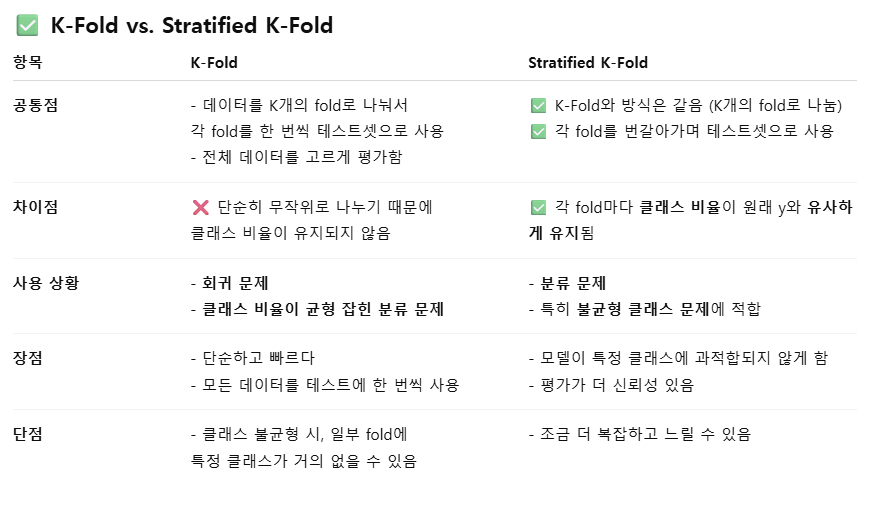